# Contours 
- Nesnenin sınırlarını bulmak için kullanılır.
- Böylece bir görüntüdeki boyutu ölçebilir, şekilleri sınıflandırabilir veya nesne sayısını belirleyebiliriz 
- Contour detection için görüntü bazı ön işlemlerden geçirilir. Görüntüyü gri tonlamaya çeviririz.
- Daha sonra binary siyah-beyaz bir görüntü elde etmek için threshold işlemi uygularız.
- Ardından scikit-image kütüphanesindeki find_contours fonksiyonunu kullanarak konturları buluruz.

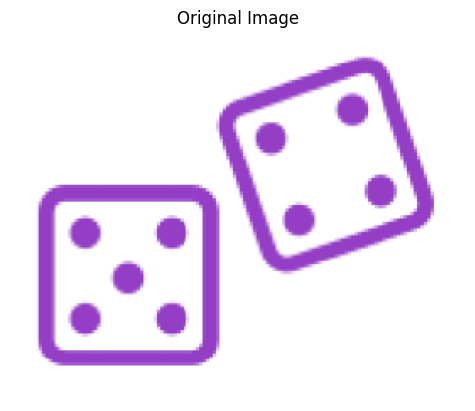

In [1]:
import matplotlib.pyplot as plt
image = plt.imread('zar.png')
plt.imshow(image), plt.axis('off'), plt.title('Original Image');

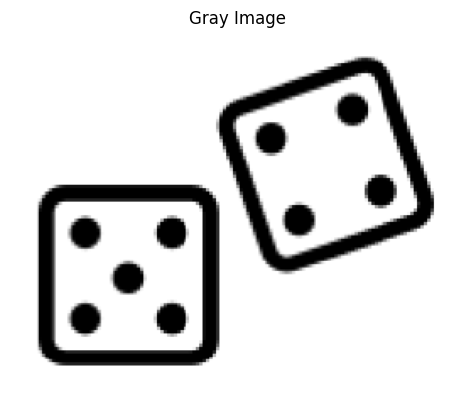

In [2]:
# Preprocessing
# rgb to gray
from skimage import color
image = color.rgb2gray(image)
plt.imshow(image, cmap='gray'), plt.axis('off'), plt.title('Gray Image');

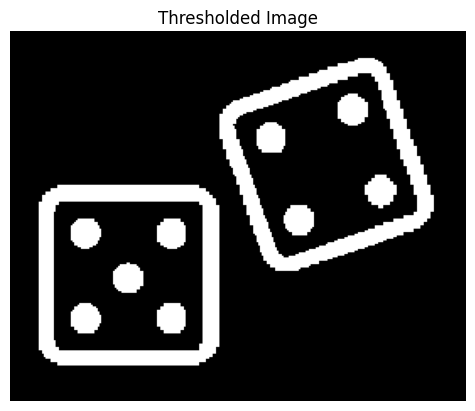

In [7]:
from skimage.filters import threshold_otsu
# Binarize the image 
thresh = threshold_otsu(image)

thresholded_image = image <= thresh
plt.imshow(thresholded_image, cmap='gray'), plt.axis('off'), plt.title('Thresholded Image');

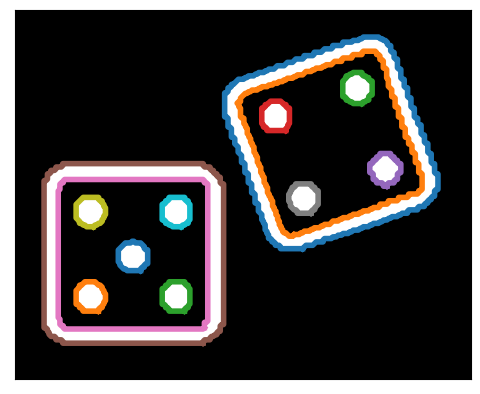

In [10]:
# Contour Detection
from skimage import measure
# 0.8 is the contour level - 0-1 araasında değişir 1 e ne kadar yakınsa o kadar hassastır
contours = measure.find_contours(thresholded_image, 0.8) # Görüntünün tüm konturlarını içeren bir liste döndürür.

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(thresholded_image, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=4)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [11]:
# Tespit edilen contourları inceleyelim 
for contour in contours:
    print(contour.shape)

(507, 2)
(437, 2)
(75, 2)
(71, 2)
(79, 2)
(429, 2)
(353, 2)
(73, 2)
(73, 2)
(71, 2)
(73, 2)
(73, 2)
(71, 2)


Bu listeden yola çıkarak şu yorumu yapabiliriz 
- 507 ve 429 zarların dış çizgilerinin boyutu 
- 437 ve 353 zarların iç çizgilerinin boyutu
- 75 , 71 ve 73 numaraları konturlar ise noktaları gösterir.